In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pulp
import sys
import os
import importlib.util
import importlib
import gurobipy as gp

# モジュールを強制的に再ロード（古いキャッシュをクリア）
if 'code' in sys.modules:
    del sys.modules['code']
# サブモジュールも削除
for module_name in list(sys.modules.keys()):
    if module_name.startswith('code.'):
        del sys.modules[module_name]

current_dir = os.getcwd()
spec = importlib.util.spec_from_file_location("code", os.path.join(current_dir, "code", "__init__.py"))
code_module = importlib.util.module_from_spec(spec)
sys.modules["code"] = code_module
spec.loader.exec_module(code_module)

# サブモジュールも再ロード
importlib.reload(code_module)

make_tensor_grid_2d = code_module.make_tensor_grid_2d
make_tensor_grid_3d = code_module.make_tensor_grid_3d
product_beta_density = code_module.product_beta_density
mixture_beta_pdf = code_module.mixture_beta_pdf
solve_mechanism_single_agent = code_module.solve_mechanism_single_agent
solve_mechanism_single_agent_iterative = code_module.solve_mechanism_single_agent_iterative
plot_polyhedral_regions = code_module.plot_polyhedral_regions
save_results_single_agent = code_module.save_results_single_agent
load_results_single_agent = code_module.load_results_single_agent

print("モジュールを再ロードしました（混合ベータ分布対応版）")


モジュールを再ロードしました（混合ベータ分布対応版）


In [3]:
home_license = os.path.expanduser('~/gurobi.lic')
os.environ['GRB_LICENSE_FILE'] = home_license

SOLVER = pulp.GUROBI(msg=True)


# ケース1: 1人3財（シナジーなし）


In [3]:
# ケース1: 財a, 財b, 財cはBeta(1,1)
NX, NY, NZ = 30, 30, 30
BETA_PARAMS = [
    (1.0, 1.0),
    (1.0, 1.0),
    (1.0, 1.0),
]

points, weights = make_tensor_grid_3d(NX, NY, NZ, BETA_PARAMS)
print(f"#types = {len(points)}")
print(f"First point: {points[0]}, weight: {weights[0]}")


#types = 27000
First point: (0.016666666666666666, 0.016666666666666666, 0.016666666666666666), weight: 3.7037037037037037e-05


In [4]:
status, obj_val, u_sol, p_sol, n_iter = solve_mechanism_single_agent_iterative(
    points, weights, grid_sizes=(NX, NY, NZ), solver=SOLVER
)

print("LP status:", status)
print("Optimal revenue:", obj_val)
print(f"Number of iterations: {n_iter}")

# 結果を保存
filepath_case1 = save_results_single_agent(
    points, weights, u_sol, p_sol, obj_val, status,
    grid_sizes=(NX, NY, NZ),
    n_iter=n_iter,
    filename="results_daskalakis_case1.npz"
)

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 156600 rows, 108000 columns and 469800 nonzeros (Max)
Model fingerprint: 0xd5b9e9d7
Model has 108000 linear objective coefficients
Coefficient statistics:
  Matrix range     [3e-02, 1e+00]
  Objective range  [6e-07, 4e-05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 2526 rows and 2700 columns
Presolve time: 0.16s
Presolved: 154074 rows, 105300 columns, 484164 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Orde

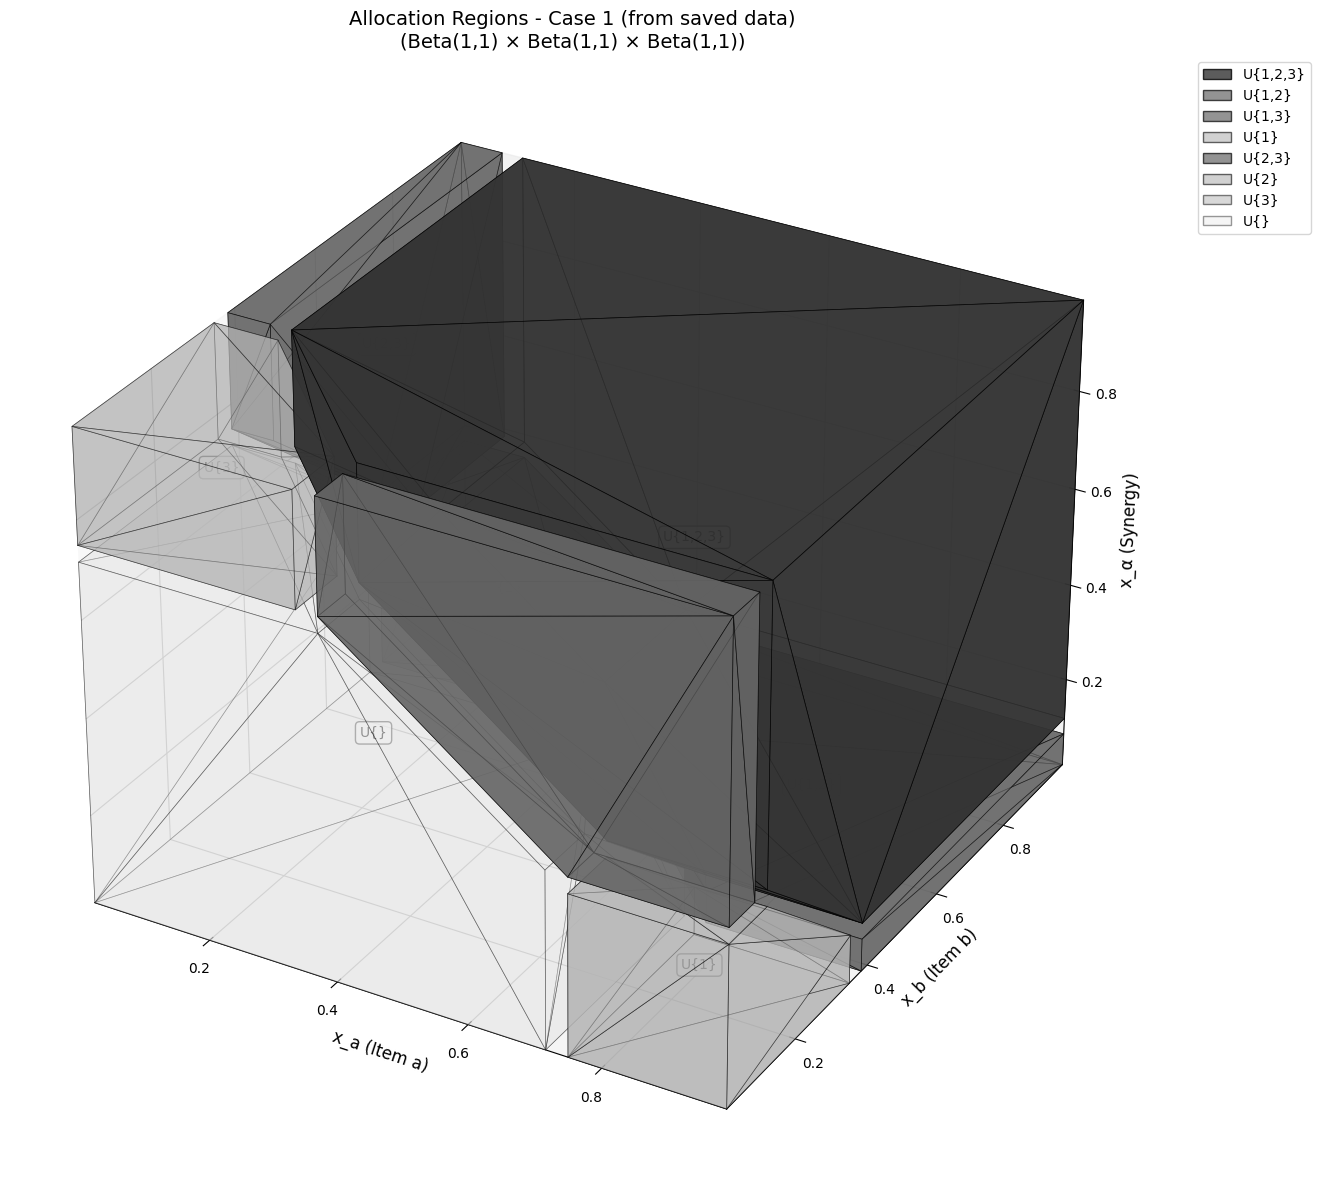

領域の統計:
  U{1,2,3}: 15525 点
  U{1,2}: 885 点
  U{1,3}: 885 点
  U{1}: 744 点
  U{2,3}: 885 点
  U{2}: 744 点
  U{3}: 744 点
  U{}: 6588 点


In [5]:
# 保存されたデータから読み込んで可視化
data = load_results_single_agent("data/results_daskalakis_case1.npz")
plot_polyhedral_regions(
    data['points'], data['p'], data['p'][2, :],
    title="Allocation Regions - Case 1 (from saved data)\n(Beta(1,1) × Beta(1,1) × Beta(1,1))"
)


# ケース2

#types = 15625
重みの合計: 1.000000


/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_29315/909000612.py:36: UserWarning: Glyph 36001 (\N{CJK UNIFIED IDEOGRAPH-8CA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_29315/909000612.py:36: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_29315/909000612.py:36: UserWarning: Glyph 35413 (\N{CJK UNIFIED IDEOGRAPH-8A55}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_29315/909000612.py:36: UserWarning: Glyph 20385 (\N{CJK UNIFIED IDEOGRAPH-4FA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_29315/909000612.py:36: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09

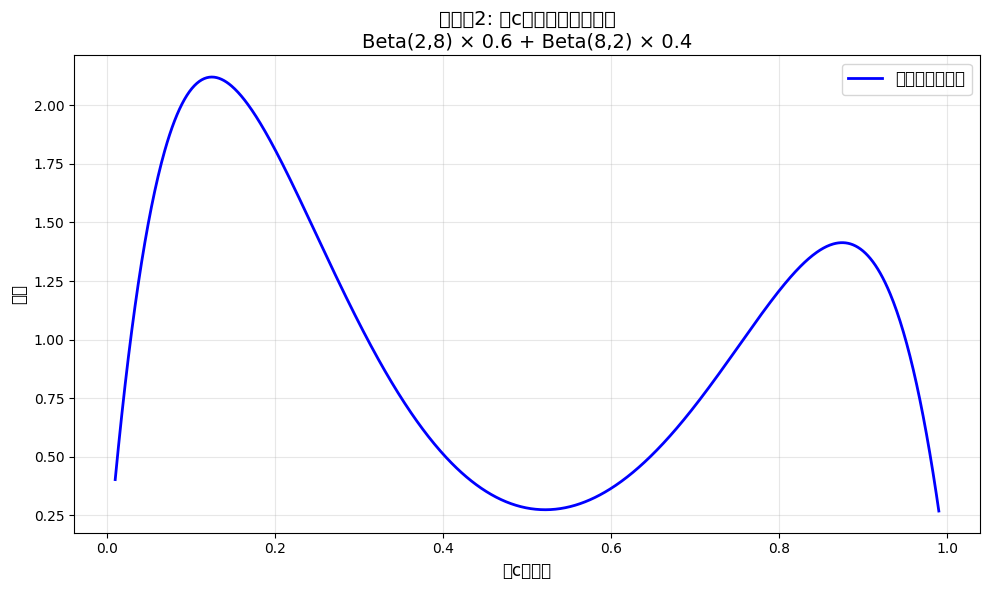

In [4]:
# ケース2（改良版）: 財a, 財bは一様分布、財cは混合ベータ分布
NX2, NY2, NZ2 = 25, 25, 25

# 混合ベータ分布の定義
# 2つのベータ分布を重み付きで混合
MIXTURE_BETA_PARAMS = {
    'type': 'mixture_beta',
    'components': [
        {'params': (2.0, 8.0), 'weight': 0.6},  # 左側の峰（低い値に集中）
        {'params': (8.0, 2.0), 'weight': 0.4}   # 右側の峰（高い値に集中）
    ],
    'range': (0.0, 1.0)
}

BETA_PARAMS_MIXTURE = [
    {'type': 'uniform', 'range': (0.3, 1.3)},  # 財a: 一様分布
    {'type': 'uniform', 'range': (0.3, 1.3)},  # 財b: 一様分布
    MIXTURE_BETA_PARAMS  # 財c: 混合ベータ分布
]

points2, weights2 = make_tensor_grid_3d(NX2, NY2, NZ2, BETA_PARAMS_MIXTURE)
print(f"#types = {len(points2)}")
print(f"重みの合計: {sum(weights2):.6f}")

# 混合分布の可視化（オプション）
z_values = np.linspace(0.01, 0.99, 1000)
mixture_density = mixture_beta_pdf(z_values, MIXTURE_BETA_PARAMS['components'], 0.0, 1.0)

plt.figure(figsize=(10, 6))
plt.plot(z_values, mixture_density, 'b-', linewidth=2, label='混合ベータ分布')
plt.xlabel('財cの評価', fontsize=12)
plt.ylabel('密度', fontsize=12)
plt.title('ケース2: 財cの混合ベータ分布\nBeta(2,8) × 0.6 + Beta(8,2) × 0.4', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
status2, obj_val2, u_sol2, p_sol2, n_iter2 = solve_mechanism_single_agent_iterative(
    points2, weights2, grid_sizes=(NX2, NY2, NZ2), solver=SOLVER
)

print("LP status:", status2)
print("Optimal revenue:", obj_val2)
print(f"Number of iterations: {n_iter2}")

# 結果を保存
filepath_case2 = save_results_single_agent(
    points2, weights2, u_sol2, p_sol2, obj_val2, status2,
    grid_sizes=(NX2, NY2, NZ2),
    n_iter=n_iter2,
    filename="results_daskalakis_case2_mixture.npz"
)
print(f"結果を保存しました: {filepath_case2}")


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2749041
Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Gurobi Optimizer version 13.0.0 build v13.0.0rc1 (mac64[arm] - Darwin 25.1.0 25B78)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Academic license 2749041 - for non-commercial use only - registered to ko___@u.northwestern.edu
Optimize a model with 90000 rows, 62500 columns and 270000 nonzeros (Max)
Model fingerprint: 0x7a8ef16b
Model has 62500 linear objective coefficients
Coefficient statistics:
  Matrix range     [4e-02, 1e+00]
  Objective range  [1e-06, 2e-04]
  Bounds range     [1e+00, 1e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 1730 rows and 1875 columns
Presolve time: 0.13s
Presolved: 88270 rows, 60625 columns, 279723 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering 

In [ ]:
# 保存されたデータから読み込んで可視化
data_case2 = load_results_single_agent("data/results_daskalakis_case2_mixture.npz")
plot_polyhedral_regions(
    data_case2['points'], data_case2['p'], data_case2['p'][2, :],
    title="Allocation Regions - Case 2 (Mixture Beta)\n(Uniform(0.3,1.3) × Uniform(0.3,1.3) × Mixture Beta)"
)
